In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from tempfile import TemporaryFile
import csv
import numpy as np
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import cv2

In [0]:
X = np.load('/content/gdrive/My Drive/data_4_levels_balanced_75_75_3.npy') 
Y = np.load('/content/gdrive/My Drive/labels_4_levels_balanced.npy')

In [0]:
print(X.shape)
print(X)

(6254, 75, 75, 3)
[[[[191. 199. 184.]
   [191. 199. 184.]
   [193. 199. 185.]
   ...
   [211. 208. 199.]
   [210. 210. 200.]
   [210. 210. 200.]]

  [[191. 199. 184.]
   [191. 199. 184.]
   [193. 199. 185.]
   ...
   [211. 208. 199.]
   [210. 210. 200.]
   [210. 210. 200.]]

  [[192. 198. 184.]
   [192. 198. 184.]
   [193. 199. 185.]
   ...
   [205. 202. 193.]
   [203. 203. 193.]
   [203. 203. 193.]]

  ...

  [[165. 165. 157.]
   [165. 165. 157.]
   [167. 167. 159.]
   ...
   [164. 165. 157.]
   [167. 170. 161.]
   [167. 170. 161.]]

  [[162. 165. 158.]
   [162. 165. 158.]
   [142. 145. 138.]
   ...
   [164. 165. 157.]
   [165. 171. 161.]
   [165. 171. 161.]]

  [[162. 165. 158.]
   [162. 165. 158.]
   [142. 145. 138.]
   ...
   [164. 165. 157.]
   [165. 171. 161.]
   [165. 171. 161.]]]


 [[[205. 209. 195.]
   [205. 209. 195.]
   [205. 209. 195.]
   ...
   [205. 211. 197.]
   [203. 209. 195.]
   [203. 209. 195.]]

  [[205. 209. 195.]
   [205. 209. 195.]
   [205. 209. 195.]
   ...
   

In [0]:
print(Y.shape)
print(Y)

(6254, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [0]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [0]:
x_train = X[:5254]
y_train = Y[:5254]
print(x_train.shape)
print(y_train.shape)

(5254, 75, 75, 3)
(5254, 4)


In [0]:
x_val = X[5254:5754]
y_val = Y[5254:5754]
print(x_val.shape)
print(y_val.shape)

(500, 75, 75, 3)
(500, 4)


In [0]:
x_test = X[5754:]
y_test = Y[5754:]
print(x_test.shape)
print(y_test.shape)

(500, 75, 75, 3)
(500, 4)


(75, 75, 3)


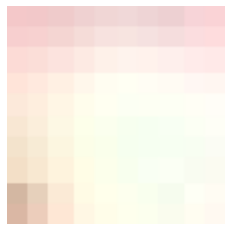

[0. 0. 0. 1.]


In [0]:
# picking a test sample before generating adversarial examples 
Image = x_test[ 5, :]
print( Image.shape )
r,g,b = cv2.split(Image)       # get b,g,r
Image = cv2.merge([r,g,b])

plt.imshow( Image.astype('uint8') )
plt.axis( 'off' )
plt.show( )
print(y_test[5])

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [0]:
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
import keras
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(75,75,3))
output = inception.layers[-1].output
output = keras.layers.Flatten()(output)
inception = Model(inception.input, output=output)
for layer in inception.layers:
    layer.trainable = False
inception.summary()

87916544/87910968 [==============================] - 8s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  import sys


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.regularizers import l2
model_Sigmoid = Sequential()
model_Sigmoid.add(inception)
model_Sigmoid.add(Dense(512, activation='relu', input_dim=(75,75,3), kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(4, activation='sigmoid'))
model_Sigmoid.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.00001),
              metrics=['accuracy'])
model_Sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 23,116,580
Trainable params: 1,313,796
Non-trainable params: 21,802,784
__________________________________

In [0]:
# RMSprop ###(lr = 0.001 -> [21.19N, 23.8N, 20.6N])Overfitting###(lr = 0.0001 -> [23.8N, 23.8N, 23.8N])Overfitting###(lr = 0.00001 -> [23.8N, 23.8N, 23.8N])###
# Adam ###(lr = 0.001 -> [22.2N, 23.8N, 10.8N])Overfitting###(lr = 0.0001 -> [23.8N, 23.8N, 23.8N])Overfitting###(lr = 0.00001 -> [23.8N, 23.8N, 23.8N])###
# SGD ###(lr = 0.001 -> [23.8N, 24.79N, 23.8N])###(lr = 0.0001 -> [23.0N, 26.8N, 26.N])###(lr = 0.00001 -> [21.79N, 28.4N, 25.6N])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#SGD lr = 0.001         ### 23.0% (ANY, lr = ANY, f1 = ANY) ###

model_Sigmoid.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 5254 samples, validate on 500 samples
Epoch 1/10
5254/5254 [==============================] - 65s 12ms/step - loss: 1.9763 - accuracy: 0.4397 - val_loss: 12.9020 - val_accuracy: 0.2280
Epoch 2/10
5254/5254 [==============================] - 58s 11ms/step - loss: 1.4028 - accuracy: 0.5579 - val_loss: 12.4442 - val_accuracy: 0.2480
Epoch 3/10
5254/5254 [==============================] - 57s 11ms/step - loss: 1.2143 - accuracy: 0.5908 - val_loss: 8.7309 - val_accuracy: 0.2400
Epoch 4/10
5254/5254 [==============================] - 60s 11ms/step - loss: 1.1096 - accuracy: 0.6138 - val_loss: 12.4027 - val_accuracy: 0.2420
Epoch 5/10
5254/5254 [==============================] - 58s 11ms/step - loss: 1.0405 - accuracy: 0.6313 - val_loss: 10.1209 - val_accuracy: 0.2320
Epoch 6/10
5254/5254 [==============================] - 57s 11ms/step - loss: 1.0092 - accuracy: 0.6447 - val_loss: 12.2463 - val_accuracy: 0.2440
Epoch 7/10
5254/5254 [==============================] - 57s 11ms/step - 

In [0]:
model_Sigmoid.evaluate(x_test, y_test)

500/500 [==============================] - 2s 3ms/step


[9.193091163635254, 0.21799999475479126]

In [0]:
# predict probabilities for test set
yhat_probs_Sigmoid = model_Sigmoid.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Sigmoid = model_Sigmoid.predict_classes(x_test, verbose=0)
yhat_probs_Sigmoid = np.argmax(yhat_probs_Sigmoid, axis=1)
print(yhat_probs_Sigmoid.shape)
print(yhat_classes_Sigmoid.shape)

(500,)
(500,)


In [0]:
print(y_test.shape)
y_test_Sigmoid = np.argmax(y_test, axis=1)
print(y_test_Sigmoid.shape)

(500, 4)
(500,)


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Sigmoid = accuracy_score(y_test_Sigmoid, yhat_classes_Sigmoid)
print('Accuracy Sigmoid: %f' % accuracy_Sigmoid)
# precision tp / (tp + fp)
precision_Sigmoid = precision_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Precision Sigmoid: %f' % precision_Sigmoid)
# recall: tp / (tp + fn)
recall_Sigmoid = recall_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Recall Sigmoid: %f' % recall_Sigmoid)
# f1: 2 tp / (2 tp + fp + fn)
f1_Sigmoid = f1_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('F1 score Sigmoid: %f' % f1_Sigmoid)

Accuracy Sigmoid: 0.218000
Precision Sigmoid: 0.057128
Recall Sigmoid: 0.250000
F1 score Sigmoid: 0.093003


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
model_Softmax = Sequential()
model_Softmax.add(inception)
model_Softmax.add(Dense(512, activation='relu', input_dim=(75,75,3), kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(4, activation='softmax'))
model_Softmax.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.00001),
              metrics=['accuracy'])
model_Softmax.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              21802784  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2052      
Total params: 23,116,580
Trainable params: 1,313,796
Non-trainable params: 21,802,784
__________________________________

In [0]:
# RMSprop ###(lr = 0.001 -> [15.6N, 24.19N, 21.79N])Overfitting###(lr = 0.0001 -> [9.39N, 10.19N, 17.2N])Overfitting###(lr = 0.00001 -> [23.8N, 23.8N, 23.39N])###
# Adam ###(lr = 0.001 -> [23.0N, 15.19N, 16.79N])Overfitting###(lr = 0.0001 -> [19.79N, 22.4N, 19.59N])Overfitting###(lr = 0.00001 -> [23.8N, 23.8N, 36.59NOG])###
# SGD ###(lr = 0.001 -> [23.8N, 20.8N, 23.19N])###(lr = 0.0001 -> [20.0N, 28.4N, 31.79N])###(lr = 0.00001 -> [18.79N, 35.19N, 21.79N])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#RMSprop lr = 0.00001       ### 35.19% (SGD, lr = 0.00001, f1 = 0.247991) ANY ###

model_Softmax.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 5254 samples, validate on 500 samples
Epoch 1/10
5254/5254 [==============================] - 8s 2ms/step - loss: 2.7664 - accuracy: 0.2528 - val_loss: 68.4300 - val_accuracy: 0.2900
Epoch 2/10
5254/5254 [==============================] - 4s 752us/step - loss: 2.7681 - accuracy: 0.2524 - val_loss: 68.1168 - val_accuracy: 0.2900
Epoch 3/10
5254/5254 [==============================] - 4s 750us/step - loss: 2.7710 - accuracy: 0.2482 - val_loss: 67.8586 - val_accuracy: 0.2900
Epoch 4/10
5254/5254 [==============================] - 4s 751us/step - loss: 2.7601 - accuracy: 0.2488 - val_loss: 67.6003 - val_accuracy: 0.2880
Epoch 5/10
5254/5254 [==============================] - 4s 753us/step - loss: 2.7650 - accuracy: 0.2505 - val_loss: 67.3185 - val_accuracy: 0.2880
Epoch 6/10
5254/5254 [==============================] - 4s 752us/step - loss: 2.7661 - accuracy: 0.2530 - val_loss: 67.0288 - val_accuracy: 0.2920
Epoch 7/10
5254/5254 [==============================] - 4s 751us/step - l

In [0]:
model_Softmax.evaluate(x_test, y_test)

500/500 [==============================] - 1s 1ms/step


[61.03939959716797, 0.35199999809265137]

In [0]:
# predict probabilities for test set
yhat_probs_Softmax = model_Softmax.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Softmax = model_Softmax.predict_classes(x_test, verbose=0)
yhat_probs_Softmax = np.argmax(yhat_probs_Softmax, axis=1)
print(yhat_probs_Softmax.shape)
print(yhat_classes_Softmax.shape)

(500,)
(500,)


In [0]:
print(y_test.shape)
y_test_Softmax = np.argmax(y_test, axis=1)
print(y_test_Softmax.shape)

(500, 4)
(500,)


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Softmax = accuracy_score(y_test_Softmax, yhat_classes_Softmax)
print('Accuracy Softmax: %f' % accuracy_Softmax)
# precision tp / (tp + fp)
precision_Softmax = precision_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Precision Softmax: %f' % precision_Softmax)
# recall: tp / (tp + fn)
recall_Softmax = recall_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Recall Softmax: %f' % recall_Softmax)
# f1: 2 tp / (2 tp + fp + fn)
f1_Softmax = f1_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('F1 score Softmax: %f' % f1_Softmax)

Accuracy Softmax: 0.352000
Precision Softmax: 0.243899
Recall Softmax: 0.346462
F1 score Softmax: 0.247991


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
